 
 np 
 plt 
 mticker 
 sawtooth 
 PolynomialFeatures 
 train_test_split 
 mean_squared_error 
 make_moons 
 StandardScaler 
 LogisticRegression 
 cross_val_score 
 ElasticNetCV 
 make_regression
 lasso_path, Ridge, LassoCV, RidgeCV, ElasticNetCV

In [397]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from scipy.signal import sawtooth
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression, lars_path, Ridge, LassoCV, RidgeCV, ElasticNet
import scipy.special as sp
from sklearn.pipeline import Pipeline
import statsmodels

#np.random.seed(5)


In [398]:

n_samples = 150

X = np.sort(np.random.rand(n_samples, 1) * 4 - 2, axis=0)
y_true = sawtooth(2 * np.pi * 0.5 * X, width=0.5).ravel()
y = y_true + np.random.normal(0, 0.25, n_samples)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
y_train.shape

(120,)

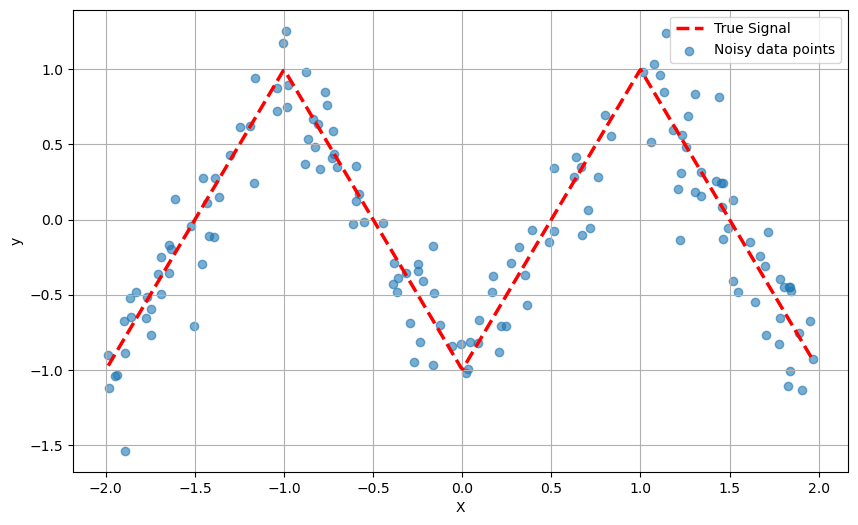

In [399]:
plt.figure(figsize=(10,6))

X_plot = np.linspace(X.min(),X.max(),500)
y_plot = sawtooth(2 * np.pi * 0.5 * X_plot, width=0.5)

plt.plot(X_plot,y_plot,'r--',label='True Signal', linewidth = 2.5)
plt.scatter(X,y,alpha=0.6,label = 'Noisy data points')
plt.grid(True)
plt.xlabel('X')
plt.ylabel('y')



plt.legend();


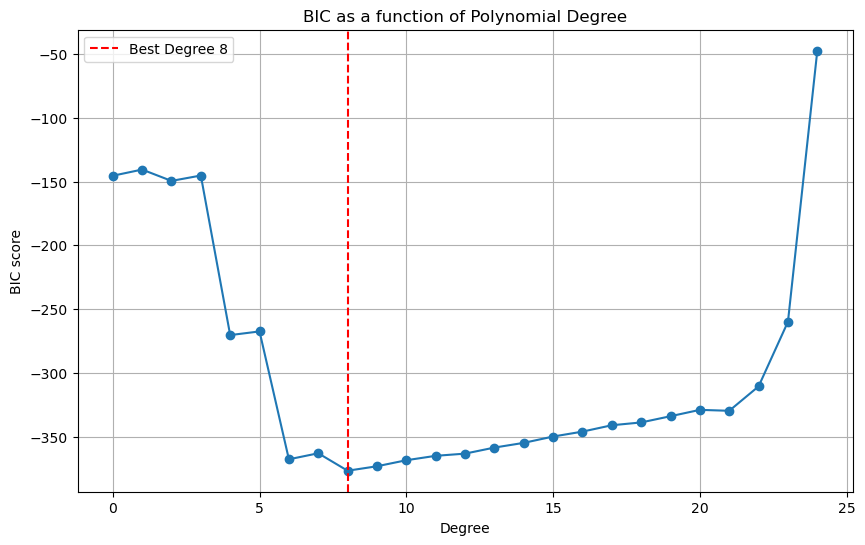

In [400]:
def BIC(n,k,RSS):
    eps = np.finfo(float).eps
    return np.log(n)*k + n*np.log((RSS/n)+eps)


degrees = np.arange(0,25)
BIC_list = []
for deg in degrees:
    
    poly = PolynomialFeatures(deg,include_bias=True)
    
    X_poly = poly.fit_transform(X)
   
   
    XtX = X_poly.T @ X_poly

    beta_hat =  np.linalg.inv( XtX) @ X_poly.T @ y[:,np.newaxis]
    # beta_hat,*_ = np.linalg.lstsq(X_poly,y)
    # beta_hat = np.linalg.pinv(X_poly) @ y


    
    y_pred  = (X_poly @ beta_hat).ravel()
    
    resid = (y-y_pred).flatten()
    RSS = np.sum(resid**2)
    BIC_list.append(BIC(y.shape[0],X_poly.shape[1],RSS))

best_degree = degrees[np.argmin(BIC_list)]
    

plt.figure(figsize=(10,6))
plt.grid()
plt.title('BIC as a function of Polynomial Degree')
plt.plot(degrees,BIC_list,marker = 'o', linestyle ='-')
plt.axvline(x = best_degree,linestyle='--', color ='red', label  = f'Best Degree {best_degree}')
plt.xlabel('Degree')
plt.ylabel('BIC score')
plt.legend()
    


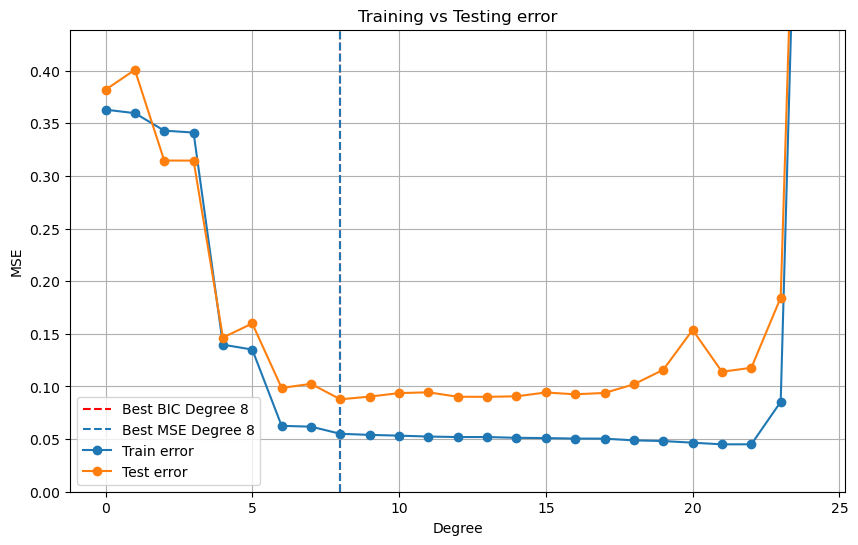

In [403]:
test_error = []
train_error = []



for deg in degrees:
    
    poly = PolynomialFeatures(deg,include_bias=True)
    
    X_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    try :
        XtX = X_poly.T @ X_poly

        beta_hat =  np.linalg.inv( XtX) @ X_poly.T @ y_train[:,np.newaxis]
        
        y_pred_train  = (X_poly @ beta_hat).ravel()
        
        y_pred_test = (X_test_poly @ beta_hat).ravel()

        test_error.append(mean_squared_error(y_test,y_pred_test))
        train_error.append(mean_squared_error(y_train,y_pred_train))
    except np.linalg.LinAlgError:
        train_error.append(np.inf)
        test_error.append(np.inf)
    

min_test_mse = degrees[np.argmin(test_error)]


plt.figure(figsize=(10,6))
plt.grid()
plt.title('Training vs Testing error')

plt.axvline(x = best_degree,linestyle='--', color ='red', label  = f'Best BIC Degree {best_degree}')
plt.axvline(x= min_test_mse,linestyle='--', label = f'Best MSE Degree {min_test_mse}')
plt.plot(degrees,train_error,marker = 'o', label='Train error')
plt.plot(degrees,test_error,marker = 'o', label='Test error')

plt.ylim(0, np.min(test_errors) * 5)

plt.xlabel('Degree')
plt.ylabel('MSE')
plt.legend()
    
